In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# for testing
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [2]:
dataset = pd.read_csv(r'C:\Users\xiaon\Downloads\diabetes.csv')
print(len(dataset))
dataset.head()

768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Peplace zeros
zero_not_accepted = dataset.columns[1:6]
print('zero_not_accepted',zero_not_accepted)

zero_not_accepted Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')


In [4]:
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)
print(dataset.Glucose)

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [5]:
# split dataset
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,test_size=0.2)

In [6]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
import math
math.sqrt(len(y_test)) # select the number of k with nearest odd number of sqrt root

12.409673645990857

In [8]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2) # p=2 equal to euclidian distance
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

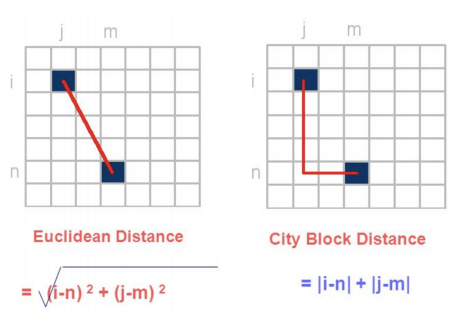
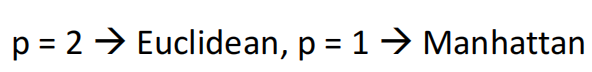

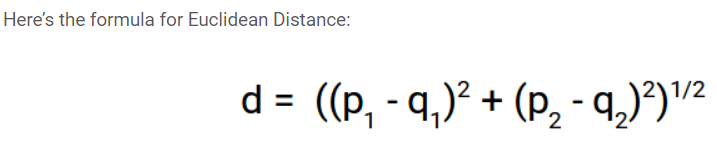

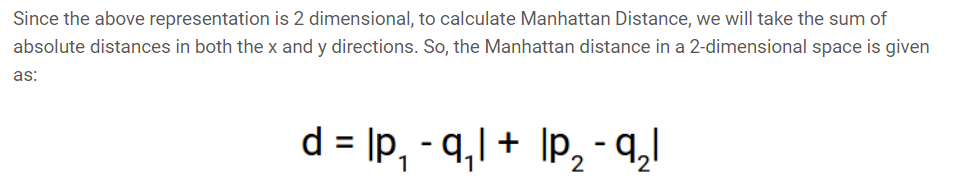

In [9]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [10]:
# evaluate Model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# diagnal is the correct true and false numer of pred

[[94 13]
 [15 32]]


In [11]:
print(f1_score(y_test, y_pred))

0.6956521739130436


In [12]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


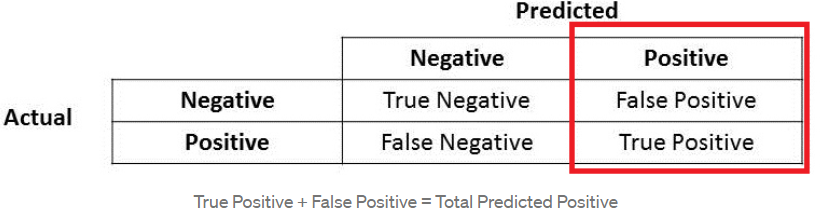
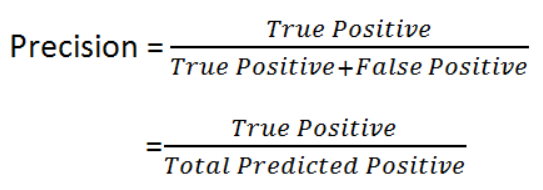

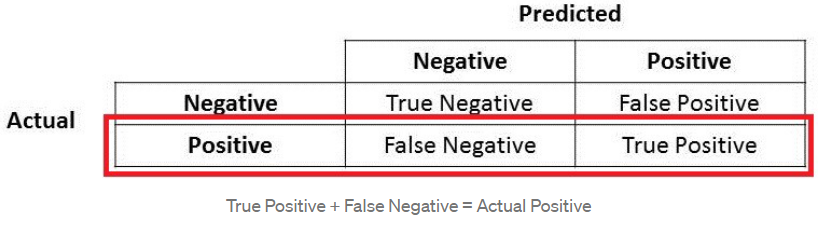

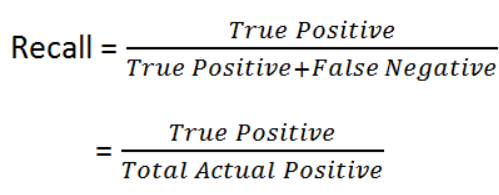

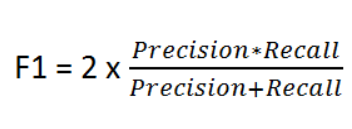